<a href="https://colab.research.google.com/github/fedhere/MLTSA22_FBianco/blob/main/inclassDTW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
def fib(n):
  ''' recusrively calculate the next fibonacci number
  '''
  if n < 2:
    return n
  return fib(n-1) + fib(n-2)


In [22]:
%time fib(3)

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 15.3 µs


2

In [25]:
%time fib(10)

CPU times: user 54 µs, sys: 0 ns, total: 54 µs
Wall time: 59.4 µs


55

In [11]:
%time fib(40)

CPU times: user 44.2 s, sys: 127 ms, total: 44.3 s
Wall time: 45.3 s


102334155

In [15]:
def fibDP(n):
  ''' dynamic programming style calculate the next fibonacci number
  '''
  fibresult = np.zeros(n+1, int)
  fibresult[1] = 1
  for i in range(2, n+1):
    fibresult[i] = fibresult[i-1] + fibresult[i-2] 
  return fibresult[-1] 
  

In [20]:
fibDP(40)

102334155

In [26]:
%time fibDP(3)

CPU times: user 41 µs, sys: 0 ns, total: 41 µs
Wall time: 45.5 µs


2

In [27]:
%time fibDP(10)

CPU times: user 55 µs, sys: 1 µs, total: 56 µs
Wall time: 61.5 µs


55

In [28]:
%time fibDP(40)

CPU times: user 71 µs, sys: 1 µs, total: 72 µs
Wall time: 79.6 µs


102334155

In [29]:


np.random.seed(123)
arr1 = np.random.randint(0,10,4)
arr2 = np.random.randint(0,10,4)
arr1

array([2, 2, 6, 1])

In [30]:
arr2

array([3, 9, 6, 1])

In [31]:
import pylab as pl

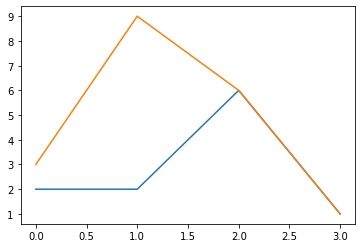

In [46]:
pl.plot(arr1)
pl.plot(arr2);

In [47]:
import scipy as sp
from scipy import spatial

In [50]:
np.diag(sp.spatial.distance_matrix(arr1.reshape(-1,1), arr2.reshape(-1,1))).sum()

8.0

In [44]:
np.atleast_2d(arr1).T

array([[2],
       [2],
       [6],
       [1]])

In [51]:
x = np.array([-2, 10, -10, 15, -13, 20, -5, 14, 2])
y = np.array([3, -13, 14, -7, 9, -2, 5, 10 , 15])

In [58]:
distm = sp.spatial.distance_matrix(y.reshape(-1,1), x.reshape(-1,1), p=2)
distm 

array([[ 5.,  7., 13., 12., 16., 17.,  8., 11.,  1.],
       [11., 23.,  3., 28.,  0., 33.,  8., 27., 15.],
       [16.,  4., 24.,  1., 27.,  6., 19.,  0., 12.],
       [ 5., 17.,  3., 22.,  6., 27.,  2., 21.,  9.],
       [11.,  1., 19.,  6., 22., 11., 14.,  5.,  7.],
       [ 0., 12.,  8., 17., 11., 22.,  3., 16.,  4.],
       [ 7.,  5., 15., 10., 18., 15., 10.,  9.,  3.],
       [12.,  0., 20.,  5., 23., 10., 15.,  4.,  8.],
       [17.,  5., 25.,  0., 28.,  5., 20.,  1., 13.]])

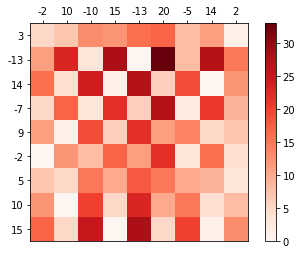

In [67]:
fig, ax = pl.subplots(1,1)
pl.imshow(distm, cmap="Reds")
pl.xticks(range(9), ['%d'%i for i in x]) 
pl.yticks(range(9), ['%d'%i for i in y]);
ax.xaxis.tick_top()
pl.colorbar();

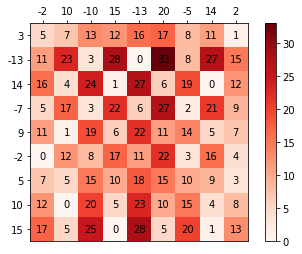

In [68]:
fig, ax = pl.subplots(1,1)
pl.imshow(distm, cmap="Reds")
pl.colorbar()

pl.xticks(range(9), ['%d'%i for i in x])
ax.xaxis.tick_top()
pl.yticks(range(9), ['%d'%i for i in y]);

for i,xx in enumerate(y):
  for j,yy in enumerate(x):
    pl.text(j, i, "%d"%distm[i][j], transform=ax.transData,
            va="center", ha="center")